<a href="https://colab.research.google.com/github/ttb-git/berkeley-engr/blob/main/Final_Analysis_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Uploading liblaries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join

from warnings import filterwarnings
filterwarnings('ignore')

In [118]:

df = pd.read_csv('/content/drive/MyDrive/practical_application_II_starter (2)/data/cars_cleaned.csv')
df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,full-size,pickup,black,al
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,full-size,truck,grey,al
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al


In [119]:
df= df.drop(columns=['region', 'state'], axis=1)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359410 entries, 0 to 359409
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         359410 non-null  int64  
 1   year          359410 non-null  float64
 2   manufacturer  359410 non-null  object 
 3   model         359410 non-null  object 
 4   condition     359410 non-null  object 
 5   cylinders     359410 non-null  object 
 6   fuel          359410 non-null  object 
 7   odometer      359410 non-null  float64
 8   title_status  359410 non-null  object 
 9   transmission  359410 non-null  object 
 10  drive         359410 non-null  object 
 11  size          359410 non-null  object 
 12  type          359410 non-null  object 
 13  paint_color   359410 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 38.4+ MB


In [121]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'model', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)



Correlation Analysis

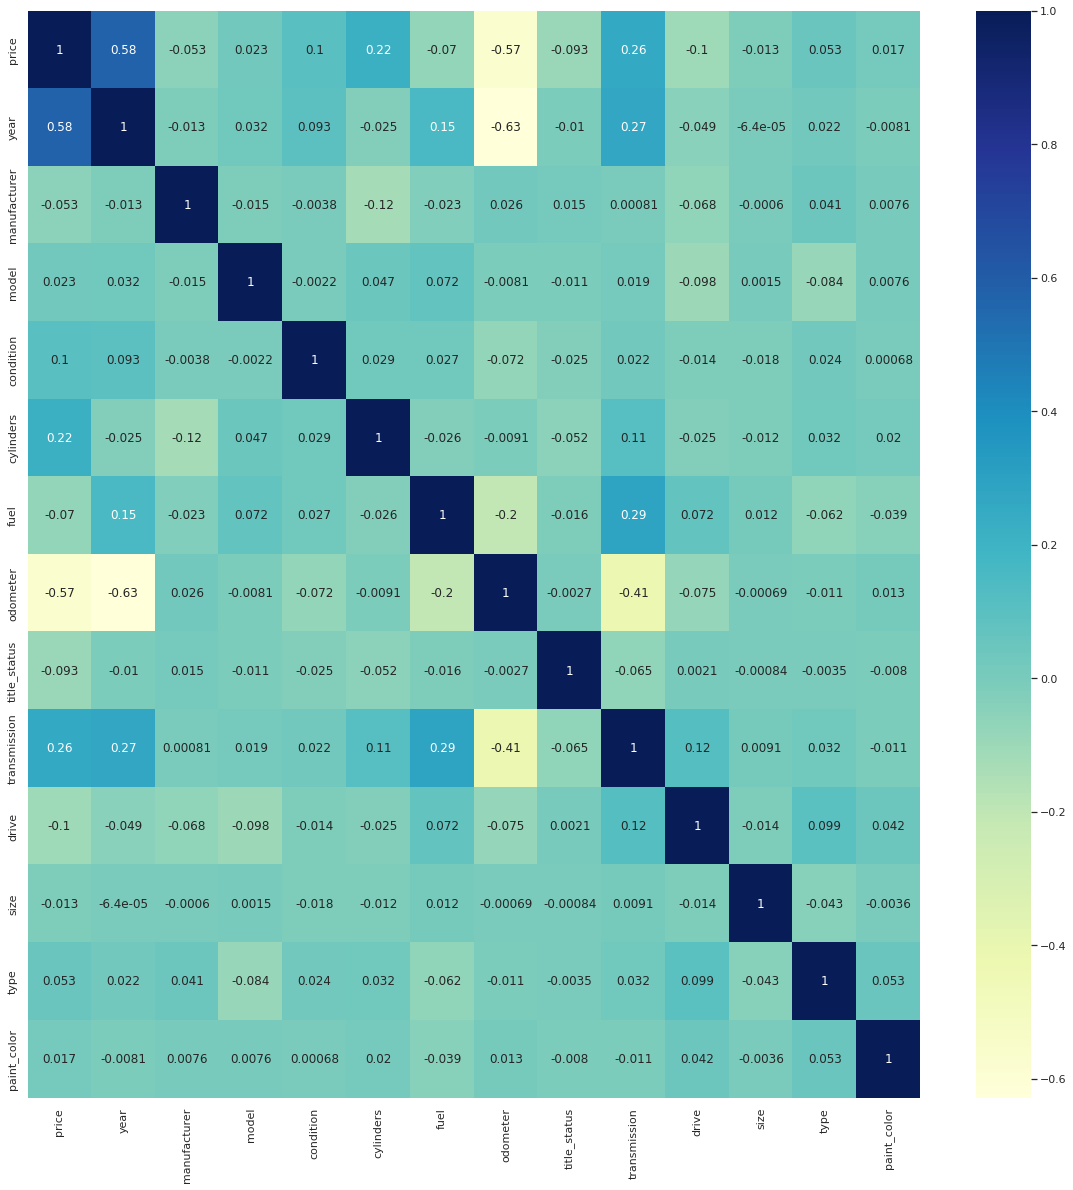

In [125]:
#Understand the Correlation in the DF
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(17,17)})

In [126]:
X = df.drop('price', axis = 1)
y = df['price']

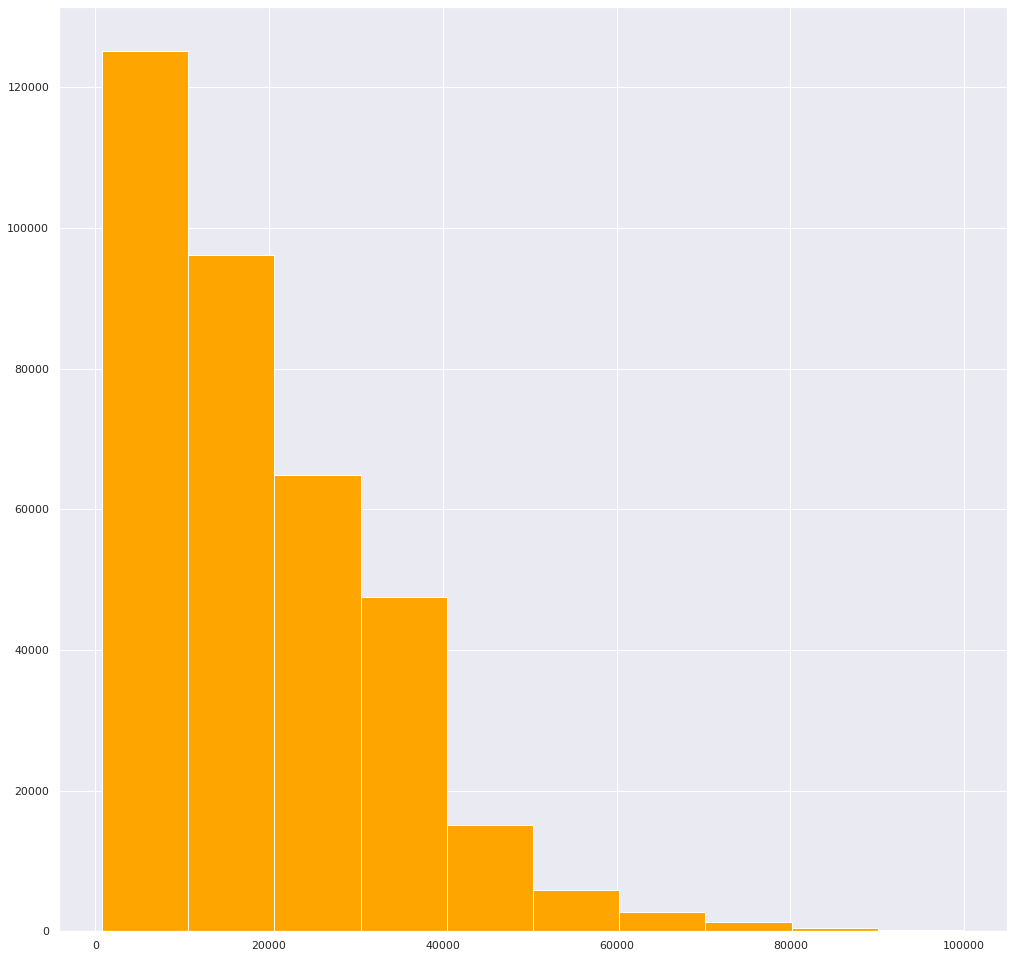

In [127]:
y.hist(color = "orange")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18ecbb8a90>,
      dtype=object)

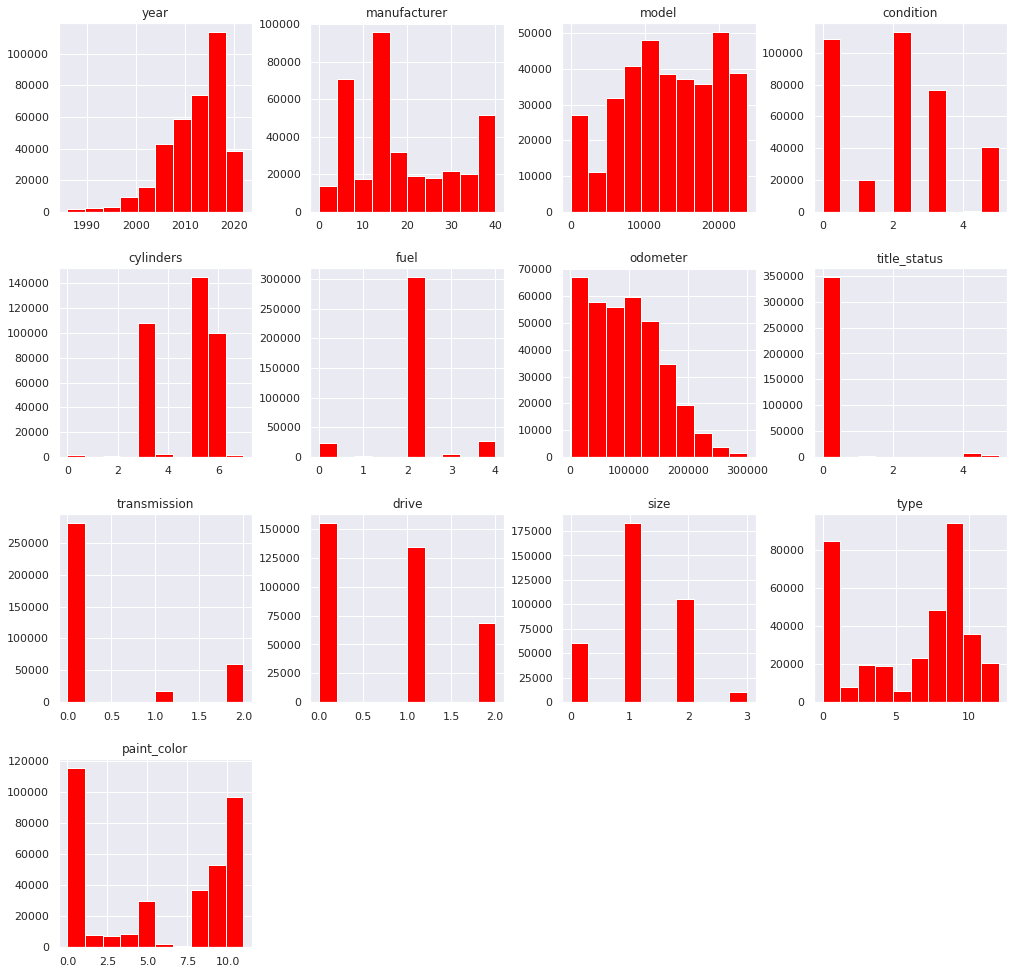

In [128]:
X.hist(color = "red")

In [129]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(269557, 13)
(89853, 13)


In [131]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

-------------Linear Regression-------------
RMSE = 9895.71
Accuracy =  51.083507641643976 %
-------------Ridge Regression--------------
RMSE = 9895.71


In [132]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

-1661815.00274635
[ 8.38063111e+02 -3.20539124e+01  8.49602018e-03  3.33290996e+02
  2.31470259e+03 -3.74885973e+03 -8.48309639e-02 -1.46777030e+03
  9.81744331e+02 -1.97238237e+03 -1.48394318e+02  1.07496532e+02
  5.66127331e+01]


In [133]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,838.063111
manufacturer,-32.053912
model,0.008496
condition,333.290996
cylinders,2314.702595
fuel,-3748.859731
odometer,-0.084831
title_status,-1467.770303
transmission,981.744331
drive,-1972.382374


In [134]:
OLS_pred= regressor.predict(X_train)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

Check performance of the OLS on test data

In [135]:
y_pred = regressor.predict(X_test)

In [136]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
292705,45990,29411.15
186598,34990,36167.91
144232,3800,-30.52
354043,14288,15772.85
113556,36980,26763.84
313148,24990,28443.44
307984,21590,28959.98
229515,6900,15902.13
199443,27395,24168.46
148198,33997,23075.30


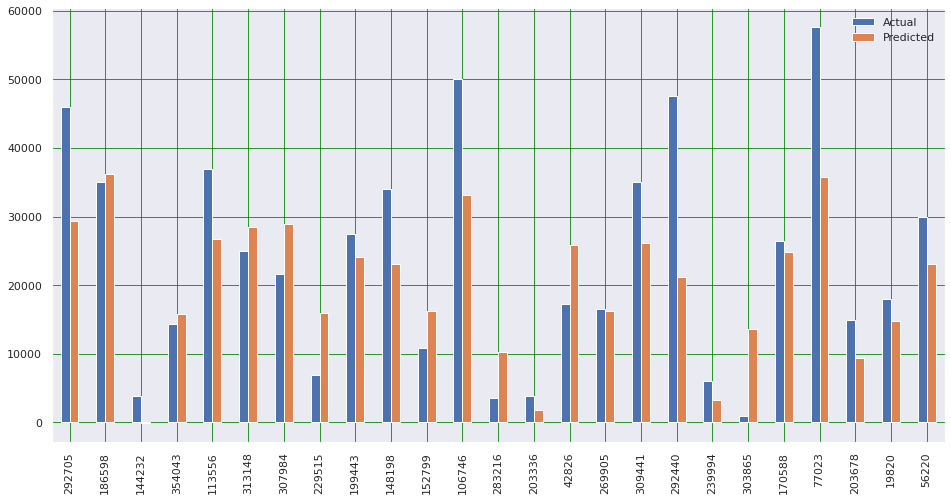

In [144]:
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.8', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.8', color='black')
plt.show()

Evaluate OLS prediction on test data

In [145]:
y_pred = regressor.predict(X_test)

In [146]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 7225.87
Mean Squared Error: 97925034.98
Root Mean Squared Error: 9895.71


#Ridge Regression

In [147]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

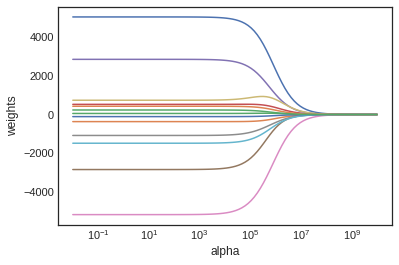

In [148]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [149]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

###Finally, we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, and examine the coefficient estimates.

In [150]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

year             835.508522
manufacturer     -32.044270
model              0.008523
condition        333.595527
cylinders       2303.273203
fuel           -3724.324459
odometer          -0.084460
title_status   -1460.722830
transmission     989.230000
drive          -1964.275485
size            -148.184013
type             107.334584
paint_color       56.442136
dtype: float64


In [151]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

Mean Absolute Error: 7225.15
Mean Squared Error: 97928430.14
Root Mean Squared Error: 9895.88


Text(0.5, 1.0, 'Feature importance using Ridge Model')

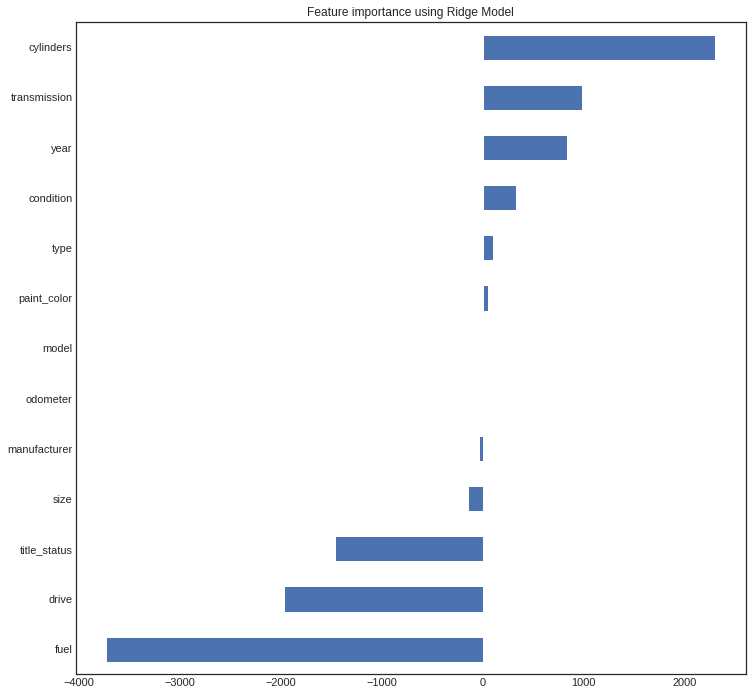

In [154]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")



---



---



---



---



---



#Lasso

In [155]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

No handles with labels found to put in legend.


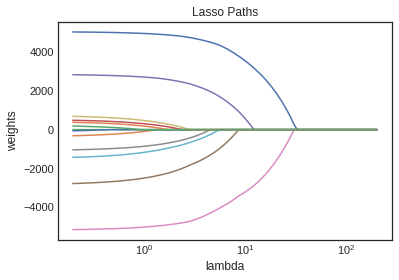

In [156]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [157]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

Best alpha using built-in LassoCV: 0.015687
Best score using built-in LassoCV: 0.513768
Root Mean Squared Error: 9895.83


In [158]:
y_pred = reg.predict(X_test)

In [159]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 7226.19
Mean Squared Error: 97927476.83
Root Mean Squared Error: 9895.83


In [160]:
reg.alpha_

0.01568691618654288

In [ ]:
coef

Text(0.5, 1.0, 'Feature importance using Lasso Model')

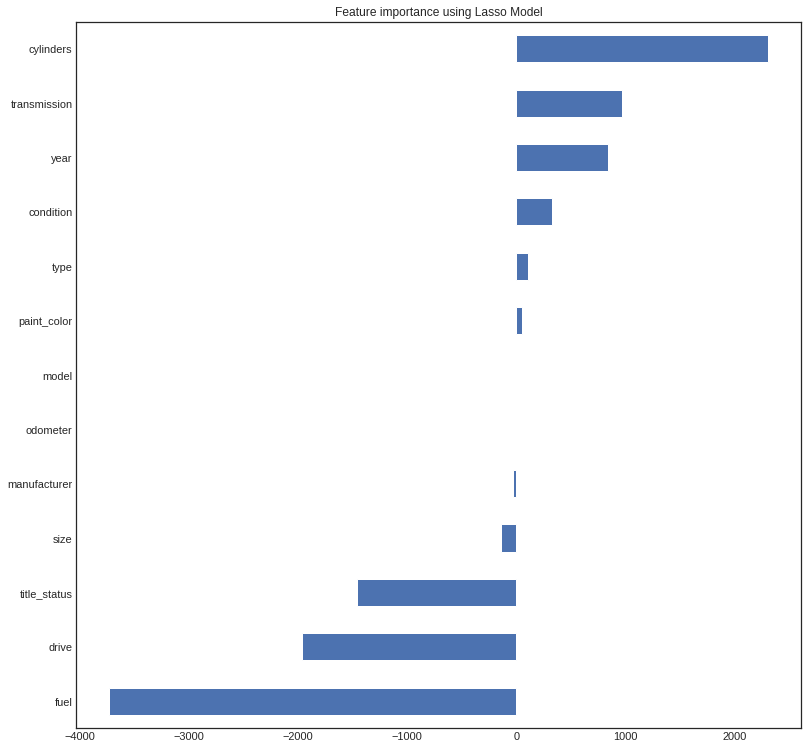

In [162]:
imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (13.0, 13.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [163]:
lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha = ", train_score001)
print ("test score for alpha = ", test_score001)
print ("number of features used: for alpha = ", coeff_used001)

training score for alpha =  0.5132435195918412
test score for alpha =  0.5101448807790192
number of features used: for alpha =  12


#KNN

In [164]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [165]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 7695.424317147372
RMSE value for k=  2 is: 7367.400813939839
RMSE value for k=  3 is: 7435.2718809156895
RMSE value for k=  4 is: 7553.182741915963
RMSE value for k=  5 is: 7672.244714175627
RMSE value for k=  6 is: 7788.745904018688
RMSE value for k=  7 is: 7898.851488508709
RMSE value for k=  8 is: 8005.034626749569
RMSE value for k=  9 is: 8086.951550524175
RMSE value for k=  10 is: 8159.6288128156775
RMSE value for k=  11 is: 8233.16978371386
RMSE value for k=  12 is: 8307.570671954567
RMSE value for k=  13 is: 8374.549649999415
RMSE value for k=  14 is: 8439.268463843975
RMSE value for k=  15 is: 8498.914467451295


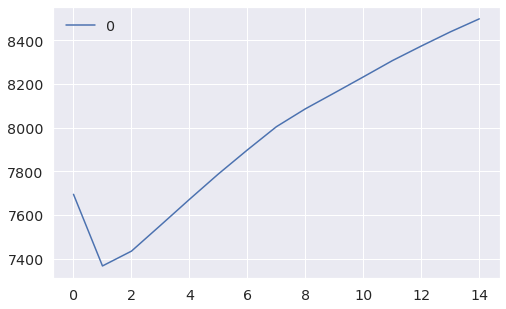

In [167]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

###This means that we can make the best prediction by looking at two to six nearest neighbors of a data point. The number depends on the insight of the researcher.

Generating Model for K=1

In [168]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Model Evaluation

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5106785527472649


In [170]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Mean Absolute Error: 3347.03
Mean Squared Error: 59219555.42
Root Mean Squared Error: 7695.42
Accuracy: 51.07 %
